## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3


In [7]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6


In [8]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [9]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)

In [10]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [11]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[08:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:245.89	validation_1-rmse:244.351
[1]	validation_0-rmse:230.406	validation_1-rmse:228.857
[2]	validation_0-rmse:216.888	validation_1-rmse:215.145
[3]	validation_0-rmse:205.056	validation_1-rmse:203.169
[4]	validation_0-rmse:194.908	validation_1-rmse:192.987
[5]	validation_0-rmse:186.243	validation_1-rmse:184.443
[6]	validation_0-rmse:178.53	validation_1-rmse:176.909
[7]	validation_0-rmse:172.045	validation_1-rmse:170.663
[8]	validation_0-rmse:166.489	validation_1-rmse:165.261
[9]	validation_0-rmse:161.834	validation_1-rmse:160.827
[10]	validation_0-rmse:157.87	validation_1-rmse:156.998
[11]	validation_0-rmse:154.468	validation_1-rmse:153.824
[12]	validation_0-rmse:151.533	validation_1-rmse:151.042
[13]	validation_0-rmse:148.949	validation_1-rmse:148.725
[14]	validation_0-rmse:146.857	validation_1-rmse:146.758
[15]	validation_0-rmse:145.01	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [12]:
eval_result = regressor.evals_result()

In [13]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [14]:
print(training_rounds)

range(0, 100)


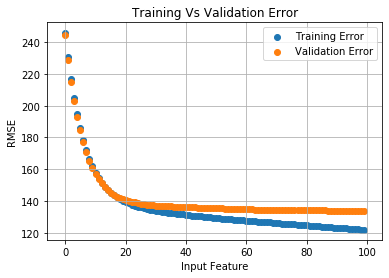

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

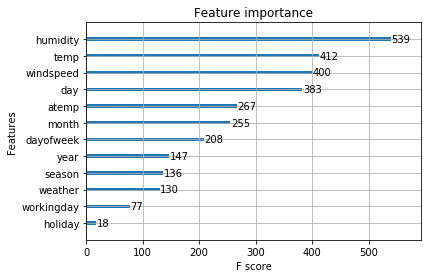

In [16]:
xgb.plot_importance(regressor)

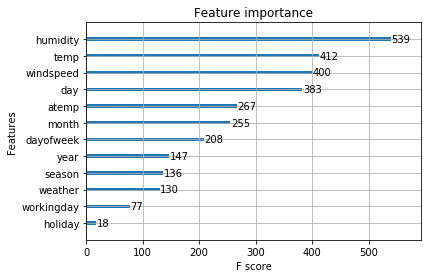

In [17]:
xgb.plot_importance(regressor)

In [18]:
df = pd.read_csv('bike_all.csv')

In [19]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5


In [20]:
X_test = df.iloc[:,1:]
print(X_test[:5])

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  dayofweek  
0  2011      1    1          5  
1  2011      1    1          5  
2  2011      1    1          5  
3  2011      1    1          5  
4  2011      1    1          5  


In [21]:
result = regressor.predict(X_test)

In [22]:
result[:5]

array([17.75467 ,  8.602129,  8.602129, 21.296577, 21.296577],
      dtype=float32)

In [23]:
df['count_predicted'] = result

In [24]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,count_predicted
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,17.754669
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,8.602129
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,8.602129
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,21.296577
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,21.296577


In [25]:
# Negative Values are predicted
df['count_predicted'].describe()

count    10886.000000
mean       192.003555
std        120.821434
min        -27.169033
25%         99.542971
50%        165.071953
75%        255.903854
max        670.382507
Name: count_predicted, dtype: float64

In [26]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,count_predicted
2744,3,3,0,0,2,25.42,27.275,94,6.0032,2011,7,3,6,-27.169033
10196,16,4,0,0,1,9.84,12.880,93,6.0032,2012,11,10,5,-0.511961


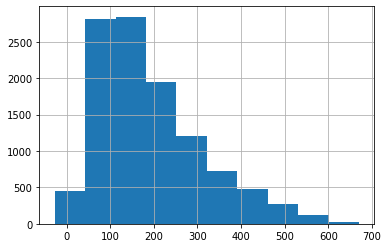

In [27]:
df['count_predicted'].hist()

In [28]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [29]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [30]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,count_predicted


In [ ]:
plt.boxplot([df['count'],df['count_predicted']], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

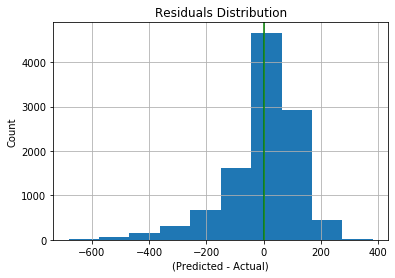

In [31]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count_predicted'] - df['count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


In [32]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 125.5771564599247


In [34]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [35]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 1.2068355335504781


In [36]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [37]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3


In [39]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [40]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3


In [41]:
result = regressor.predict(X_test)

In [42]:
result[:5]

array([62.601894, 47.69531 , 47.69531 , 71.79418 , 71.79418 ],
      dtype=float32)

In [43]:
df_test["count"] = result

In [44]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,62.601894
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,47.695309
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,47.695309
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,71.794182
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,71.794182


In [45]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,count
2459,2011-10-23 00:00:00,4,0,0,1,14.76,18.940,87,0.0000,2011,10,23,6,-2.319053
2460,2011-10-23 01:00:00,4,0,0,1,14.76,18.940,87,0.0000,2011,10,23,6,-2.319053
2461,2011-10-23 02:00:00,4,0,0,1,13.94,17.425,87,6.0032,2011,10,23,6,-4.181823
2462,2011-10-23 03:00:00,4,0,0,1,13.94,18.180,87,0.0000,2011,10,23,6,-12.174159
2463,2011-10-23 04:00:00,4,0,0,1,13.94,18.180,87,0.0000,2011,10,23,6,-12.174159
2464,2011-10-23 05:00:00,4,0,0,1,13.12,17.425,87,0.0000,2011,10,23,6,-9.255909
2466,2011-10-23 07:00:00,4,0,0,1,13.94,17.425,87,6.0032,2011,10,23,6,-4.181823
2627,2011-10-30 00:00:00,4,0,0,1,9.02,10.605,87,15.0013,2011,10,30,6,-0.559787
2634,2011-10-30 07:00:00,4,0,0,1,9.84,14.395,75,0.0000,2011,10,30,6,-19.347324
2649,2011-10-30 22:00:00,4,0,0,1,12.30,16.665,75,0.0000,2011,10,30,6,-3.697357


In [46]:
df_test["count"] = df_test["count"].map(adjust_count)

In [48]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [49]:
# RMSLE (Kaggle) Scores
# Test 1: 1.32
# Test 2 (added new feature): 0.61646